In [165]:
import pandas as pd
import numpy as np

In [166]:
freq = '90Min';

In [167]:
# Load data
load = pd.read_pickle('2015-2020_load_generation.pkl')
df = load['DE']
df = df.loc[df.index.year == 2020]
load_curve = df.groupby(df.index.hour).mean()


load_curve.index = pd.to_timedelta(load_curve.index, 'hours')
series = load_curve.resample(freq).mean()

new_frequency = pd.DataFrame(data = series.values, index = series.index, columns = ['total load'])
new_frequency['north'] = new_frequency['total load'] *1/3 
new_frequency['south'] = new_frequency['total load'] *2/3
new_frequency = new_frequency.round(1)
new_frequency

,total load,north,south
0 days 00:00:00,44774.2,14924.7,29849.5
0 days 01:30:00,43763.1,14587.7,29175.4
0 days 03:00:00,45137.8,15045.9,30091.9
0 days 04:30:00,49783.8,16594.6,33189.2
0 days 06:00:00,56330.0,18776.7,37553.3
0 days 07:30:00,60427.2,20142.4,40284.8
0 days 09:00:00,62540.8,20846.9,41693.9
0 days 10:30:00,63503.5,21167.8,42335.7
0 days 12:00:00,61904.6,20634.9,41269.7
0 days 13:30:00,60058.5,20019.5,40039.0


In [168]:
#RES data
res = pd.read_excel('in.xlsx', sheet_name = 'timeseries')
res = res.iloc[2:27, 5:9,]
res.index = pd.to_timedelta((res.index-2), 'hours')
res.columns = [['Wind_north', 'Solar_north', 'Wind_south', 'Solar_south']]

In [169]:
res

,Wind_north,Solar_north,Wind_south,Solar_south
0 days 00:00:00,0.45,0,0.32,0
0 days 01:00:00,0.41,0,0.31,0
0 days 02:00:00,0.39,0,0.28,0
0 days 03:00:00,0.36,0,0.25,0
0 days 04:00:00,0.33,0,0.19,0
0 days 05:00:00,0.3,0,0.14,0.01
0 days 06:00:00,0.24,0.02,0.1,0.07
0 days 07:00:00,0.23,0.11,0.08,0.2
0 days 08:00:00,0.22,0.27,0.05,0.39
0 days 09:00:00,0.21,0.38,0.06,0.46


In [170]:
res = res.resample(freq).mean().iloc[:-1,:]

In [171]:
new_frequency[['Wind_north', 'Solar_north', 'Wind_south', 'Solar_south']] = res

In [172]:
new_frequency

,total load,north,south,Wind_north,Solar_north,Wind_south,Solar_south
0 days 00:00:00,44774.2,14924.7,29849.5,0.430,0.000,0.315,0.000
0 days 01:30:00,43763.1,14587.7,29175.4,0.390,0.000,0.280,0.000
0 days 03:00:00,45137.8,15045.9,30091.9,0.345,0.000,0.220,0.000
0 days 04:30:00,49783.8,16594.6,33189.2,0.300,0.000,0.140,0.010
0 days 06:00:00,56330.0,18776.7,37553.3,0.235,0.065,0.090,0.135
0 days 07:30:00,60427.2,20142.4,40284.8,0.220,0.270,0.050,0.390
0 days 09:00:00,62540.8,20846.9,41693.9,0.215,0.405,0.075,0.470
0 days 10:30:00,63503.5,21167.8,42335.7,0.200,0.440,0.130,0.470
0 days 12:00:00,61904.6,20634.9,41269.7,0.180,0.380,0.145,0.325
0 days 13:30:00,60058.5,20019.5,40039.0,0.150,0.210,0.160,0.150


In [173]:
new_frequency.to_csv('16.csv')

<AxesSubplot:>

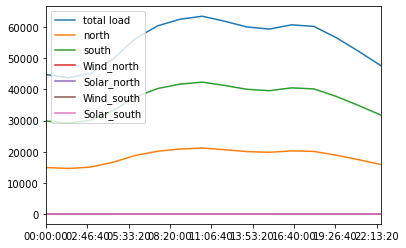

In [174]:
new_frequency.plot()

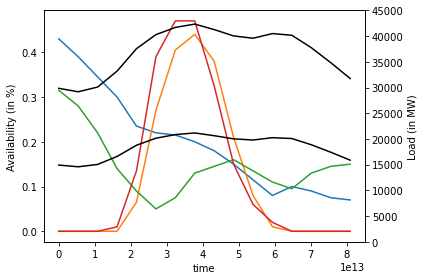

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data

fig, ax1 = plt.subplots()

ax1.set_xlabel('time')
ax1.set_ylabel('Availability (in %)')
ax1.plot(new_frequency.index, new_frequency[['Wind_north', 'Solar_north', 'Wind_south', 'Solar_south']])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Load (in MW)')
ax2.plot(new_frequency.index, new_frequency[['north','south']], color = 'black')
ax2.tick_params(axis='y')
ax2.set_ylim([0, 45000])
#ax2.ylim[0,max(new_frequency['south'])+ 1000]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()